In [303]:
import pandas as pd
import numpy as np

In [304]:
df = pd.read_csv("diabetic_data.csv",header=None)
df.columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]
df.drop(index=df.index[0], axis=0, inplace=True)

data = df.copy()
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(data.describe())
print(data.head())
print(data.dtypes.value_counts())

C:\Users\demiz\AppData\Local\Temp\ipykernel_8736\3065116560.py:1: DtypeWarning: Columns (0,1,6,7,8,9,12,13,14,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("diabetic_data.csv",header=None)


The dataset has 101766 rows and 50 columns
       encounter_id  patient_nbr       race  gender      age  weight  \
count        101766       101766     101766  101766   101766  101766   
unique       101766        73399          6       3       10      10   
top         2278392     88785891  Caucasian  Female  [70-80)       ?   
freq              1           40      76099   54708    26068   98569   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count              101766                    101766               101766   
unique                 15                        44                   27   
top                     1                         1                    7   
freq                45934                     51546                49209   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
count             101766  ...      101766  101766               101766   
unique                28  ...           1       4                  

In [305]:
data['weight'] = pd.to_numeric(data['weight'],errors='coerce') # weight in pounds
data['time_in_hospital'] = pd.to_numeric(data['time_in_hospital'],errors='coerce') # number of days between admission and discharge
data['num_lab_procedures'] = pd.to_numeric(data['num_lab_procedures'],errors='coerce') # number of lab test during the encounter
data['num_procedures'] = pd.to_numeric(data['num_procedures'],errors='coerce') # number of procedures other than lab test, during the encounter
data['num_medications'] = pd.to_numeric(data['num_medications'],errors='coerce') # number of distinct generic names administered during the encounter
data['number_outpatient'] = pd.to_numeric(data['number_outpatient'],errors='coerce') # number of outpatient visits in the year preceding the encounter
data['number_emergency'] = pd.to_numeric(data['number_emergency'],errors='coerce') # number of emergency visits in the year preceding the encounter
data['number_inpatient'] = pd.to_numeric(data['number_inpatient'],errors='coerce') # number of inpatient visits in the year preceding the encounter
data['number_diagnoses'] = pd.to_numeric(data['number_diagnoses'],errors='coerce') # number of diagnoses entered to the system 

In [306]:
print(data.dtypes.value_counts())

object     41
int64       8
float64     1
Name: count, dtype: int64


In [307]:
numeric_attributes = data.columns[data.dtypes!="object"]
categorical_attributes =data.columns[data.dtypes=="object"]
print(numeric_attributes)
print(categorical_attributes)

Index(['weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


# Handling Missing Values

## Approach C - Replacing missing values with a user defined constant

In [308]:
print('Before replacing missing values:')
data.head(20)

Before replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Replacing missing values with a user defined constant

In [309]:
data_1 = data.copy()
data_1 = data_1.fillna("?")
data_1 = data_1.replace("?", pd.NA)

### Changing current values with a user defined constant

In [310]:
data_1["admission_type_id"] = pd.to_numeric(data_1["admission_type_id"]) # this is the only place I changed original clean data(Amy)

data_1["admission_type_id"] = data_1["admission_type_id"].replace(1, "Emergency")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(2, "Urgent")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(3, "Elective")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(4, "Newborn")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(5, "Trauma Center")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(6, "Transfer")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(7, "Hospice")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(8, "Unknown")

data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("1", "Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("2", "Short Term Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("3", "SNF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("4", "ICF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("5", "Inpatient Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("6", "Home w/ Home Health Service")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("7", "Left Against Medical Advice")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("8", "Home Under Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("9", "Admitted as an inpatient")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("10", "Nenonate Discharge/Neonatal Aftercare")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("11", "Expired")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("12", "Expected Return for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("13", "Hospice/Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("14", "Hospice/Medical Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("15", "Medicare-approved Swing Bed")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("16", "Transferred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("17", "Referred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("18", "NULL")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("19", "Expired at Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("20", "Expired at Medical facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("21", "Expired, Place Unknown")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("22", "Rehabilitation Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("23", "Long Term Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("24", "Nursing Facility-Medicaid Certified")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("25", "Not Mapped")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("26", "Unknown/Invalid")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("27", "Federal Health Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("28", "Psychiatric Hospital/Unit")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("29", "Critical Access Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace("30", "Health Care Facility not Defined Elsewhere")

data_1["A1Cresult"] = data_1["A1Cresult"].replace(">7", "Moderate Risk")
data_1["A1Cresult"] = data_1["A1Cresult"].replace(">8", "High Risk")


print('\After replacing missing values:')
data_1.head(50)

\After replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Approach A - Removal of rows containing missing values

In [311]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

data_1.head(20)

There are 377214 missing values in this dataset
Number of instances = 101766
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:2273
	gender:0
	age:0
	weight:101766
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:40256
	medical_specialty:49949
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:21
	diag_2:358
	diag_3:1423
	number_diagnoses:0
	max_glu_serum:96420
	A1Cresult:84748
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [312]:
data_1 = data_1.dropna(subset=["race", "diag_1", "diag_2", "diag_3"])

In [313]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
print(data_1.describe())
print(data_1.head())

There are 360000 missing values in this dataset
Number of instances = 98053
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	weight:98053
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0
       time_in_hospital  num_lab_pro

## Approach D - Removal of attributes containing missing values

In [314]:
print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	weight:98053
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


In [315]:
data_1.drop('weight', axis=1, inplace=True) # 98053 records with missing values, deemed unusable
data_1.drop('payer_code', axis=1, inplace=True) # 38924 records with missing values, deemed unusable
data_1.drop('medical_specialty', axis=1, inplace=True) # 48318 records with missing values, deemed un

In [316]:
print('Number of missing values after removal:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
data_1.head(20)

Number of missing values after removal:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:92845
	A1Cresult:81860
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Home,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),Emergency,Home,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),Emergency,Home,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),Urgent,Home,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),Elective,Home,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),Emergency,Home,7,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),Urgent,Home,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),Elective,SNF,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
11,28236,89869032,AfricanAmerican,Female,[40-50),Emergency,Home,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,>30


# Clustering

#### Introduction:

#### The dataset comprises a decade (1999-2008) of clinical records from diabetes patients across 130 US healthcare facilities. My aim is to explore patterns in medication dosage changes using clustering methods, potentially uncovering associations with disease progression.

#### To achieve this, I employed three clustering methods: K-means, DBSCAN, and Hierarchical clustering. Following each method, I will analyze and compare the results to gain insights.

## Method 1： K-Means 

### 1. set up the clustering data

In [317]:
#using our team's processed dataset (data_1) for clustering analysis
cluster_data = data_1.copy()

# get the number of instances and attributes in the dataset
instance_count, feature_count = cluster_data.shape
print(f'Number of instances: {instance_count}, Number of attributes: {feature_count}')


Number of instances: 98053, Number of attributes: 47


### 2. choosing medication-related columns from the clustering data

In [318]:

print(cluster_data.columns)

medica_data=cluster_data[["metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","examide","citoglipton","insulin","glyburide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","tolbutamide"]]
medica_data

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
3,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
5,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101763,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
101764,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101765,No,No,No,No,No,No,Steady,No,Steady,No,...,No,No,No,No,Up,No,No,No,No,No


### 3. Converting medication dosage to numerical values: "No" -> 0, "Down" -> 1, "Steady" -> 2, "Up" -> 3

In [319]:
mapping = {"No": 0, "Down": 1, "Steady": 2, "Up": 3}

# Replace medication dosage values in the DataFrame
medica_data.replace(mapping, inplace=True)

# Display the transformed DataFrame
print(medica_data.head(15))


    metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
2           0            0            0               0            0   
3           0            0            0               0            0   
4           0            0            0               0            0   
5           0            0            0               0            0   
6           0            0            0               0            0   
7           2            0            0               0            2   
8           0            0            0               0            0   
9           0            0            0               0            0   
10          0            0            0               0            0   
11          0            0            0               0            0   
12          0            0            0               0            0   
13          2            3            0               0            0   
14          0            0            0               0         

C:\Users\demiz\AppData\Local\Temp\ipykernel_8736\834688702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medica_data.replace(mapping, inplace=True)


### 4. Applying K-Means clustering with 2 clusters and 50 maximum iterations

In [320]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(medica_data.values) 

# Obtaining cluster labels
labels = k_means.labels_

# Renaming 'patient_nbr' to 'patient_ID'
cluster_data.rename(columns={'patient_nbr': 'patient_ID'}, inplace=True)

# Creating DataFrame of cluster labels with patient IDs
pd.DataFrame(labels, cluster_data.patient_ID , columns=['Cluster ID'])


,Cluster ID
patient_ID,
55629189,1
86047875,0
82442376,1
42519267,1
82637451,1
...,...
100162476,0
74694222,1
41088789,0


### 5. Calculating centroids of the clusters and displaying them

In [321]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns=medica_data.columns)

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
0,0.401672,0.032326,0.013896,0.002423,0.097428,1.196011e-18,0.256135,0.232513,0.144204,0.121517,...,0.000831,0.000069,0.0,0.0,0.204946,0.013117,1.196011e-18,0.0,1.196011e-18,0.000519
1,0.391015,0.030794,0.014677,0.000770,0.111133,4.966846e-05,0.247796,0.182258,0.148385,0.134105,...,0.000596,0.000050,0.0,0.0,2.270668,0.014478,4.966846e-05,0.0,4.966846e-05,0.000348


In [322]:
# Generating descriptive statistics for the dataset
medica_data.describe()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.0,98053.0,98053.000000,98053.000000,98053.000000,98053.0,98053.000000,98053.000000
mean,0.397295,0.031697,0.014217,0.001744,0.103057,0.000020,0.252710,0.211875,0.145921,0.126687,...,0.000734,0.000061,0.0,0.0,1.053267,0.013676,0.000020,0.0,0.000020,0.000449
std,0.813788,0.255353,0.169774,0.060484,0.450839,0.006387,0.677535,0.630538,0.525666,0.491725,...,0.038581,0.011063,0.0,0.0,1.099934,0.165284,0.006387,0.0,0.006387,0.029955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,0.0,0.0,3.000000,3.000000,2.000000,0.0,2.000000,2.000000


### 6. Generating random test data

In [323]:
possible_values = [0, 1, 2, 3]
num_features = 21
num_samples = 5
test_data = []

# Creating random test instances
for _ in range(num_samples):
    test_instance = np.random.choice(possible_values, size=num_features)
    test_data.append(test_instance.tolist())

# Converting test data to NumPy array
test_data = np.array(test_data)

# Predicting cluster labels for test data
labels = k_means.predict(test_data)
labels = labels.reshape(-1,1)

# Assigning patient IDs
patient_ids = np.array(['patient1', 'patient2', 'patient3', 'patient4', 'patient5']).reshape(-1,1)

# Inserting patient ID and cluster ID into columns
cols = medica_data.columns.tolist()
cols.insert(0, "patient_ID")
cols.append('Cluster ID')

# Displaying test data
print(test_data)

[[0 1 3 3 3 2 3 3 0 2 3 2 2 1 1 1 2 0 0 3 1]
 [3 1 0 1 2 3 1 3 1 0 3 0 1 3 3 3 1 1 3 3 0]
 [3 1 3 0 0 0 2 0 3 1 1 1 2 0 2 0 3 2 3 3 1]
 [3 2 0 0 2 1 1 0 3 1 1 2 0 3 2 1 2 1 2 0 0]
 [1 0 1 2 1 0 1 2 1 2 2 3 3 0 2 1 1 1 3 2 0]]


### 7. Displaying test data's cluster category result

In [324]:
result = pd.DataFrame(np.concatenate((patient_ids, test_data, labels), axis=1), columns=cols)
result

,patient_ID,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,...,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide,Cluster ID
0,patient1,0,1,3,3,3,2,3,3,0,...,2,1,1,1,2,0,0,3,1,0
1,patient2,3,1,0,1,2,3,1,3,1,...,1,3,3,3,1,1,3,3,0,1
2,patient3,3,1,3,0,0,0,2,0,3,...,2,0,2,0,3,2,3,3,1,0
3,patient4,3,2,0,0,2,1,1,0,3,...,0,3,2,1,2,1,2,0,0,0
4,patient5,1,0,1,2,1,0,1,2,1,...,3,0,2,1,1,1,3,2,0,0


### 8. Calculating SSE to determine the optimal K value

Text(0, 0.5, 'SSE')

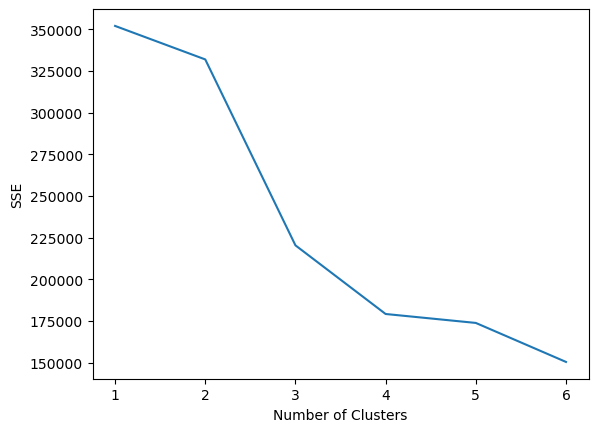

In [325]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating SSE for each cluster number using KMeans clustering for medica_data

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medica_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

### 9. Displaying medical data before dimensionality reduction

In [326]:
medica_data

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
5,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
101764,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101765,0,0,0,0,0,0,2,0,2,0,...,0,0,0,0,3,0,0,0,0,0


### 10. Dimensionality reduction: applying Principal Component Analysis (PCA) with 2 components

In [327]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(medica_data)

pca = PCA(n_components=2)
pca.fit(scaled_data)

# Extracting principal components and transforming the scaled data
principal_components = pca.components_
medicaPCA_result_data = pca.transform(scaled_data)


print("Principal Components:")
print(principal_components)
print("\n medica PCA2_result_data Data:")
print(medicaPCA_result_data)


Principal Components:
[[ 0.67332792 -0.05542557  0.04583054 -0.00356479  0.0141682   0.02846671
   0.16329435  0.51908473  0.13068284  0.37336899  0.07608985  0.06607086
  -0.00251589  0.          0.         -0.26543738 -0.07433818  0.03951771
   0.         -0.0113448   0.00141091]
 [ 0.14867323  0.12180217  0.11325384 -0.11963438  0.1534936   0.07922904
   0.65868322 -0.53995257  0.18401652  0.17327204  0.22938487  0.09228058
  -0.01952503  0.          0.          0.19823079 -0.08571607  0.0891183
   0.          0.02555484 -0.00586102]]

 medica PCA2_result_data Data:
[[-1.1658915   0.05434519]
 [ 0.04010297  1.45804342]
 [-1.1658915   0.05434519]
 ...
 [ 0.97156172  0.05928996]
 [-0.18665252  2.69883894]
 [-0.44192455 -0.4863192 ]]


### 11. Displaying a scatter plot of the medicaPCA_result_data

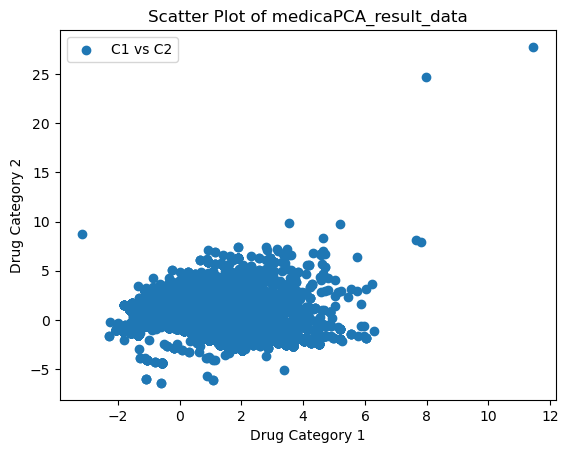

In [328]:
plt.scatter(medicaPCA_result_data[:, 0], medicaPCA_result_data[:, 1], label='C1 vs C2')
plt.xlabel('Drug Category 1')
plt.ylabel('Drug Category 2')
plt.title('Scatter Plot of medicaPCA_result_data')
plt.legend()
plt.show()

### 12. Calculating SSE for optimal K value after PCA

Text(0, 0.5, 'SSE')

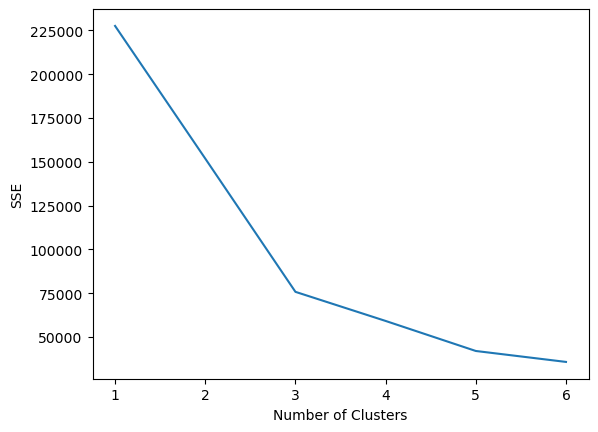

In [329]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medicaPCA_result_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

### 13. Silhouette analysis for KMeans clustering

In [330]:
silhouette_data=medicaPCA_result_data.copy()
silhouette_data

array([[-1.1658915 ,  0.05434519],
       [ 0.04010297,  1.45804342],
       [-1.1658915 ,  0.05434519],
       ...,
       [ 0.97156172,  0.05928996],
       [-0.18665252,  2.69883894],
       [-0.44192455, -0.4863192 ]])

For n_clusters = 2 The average silhouette_score is : 0.531342078352447
For n_clusters = 3 The average silhouette_score is : 0.6057246692731034
For n_clusters = 4 The average silhouette_score is : 0.6299760126459376
For n_clusters = 5 The average silhouette_score is : 0.4750140939868083
For n_clusters = 6 The average silhouette_score is : 0.4930383747307228


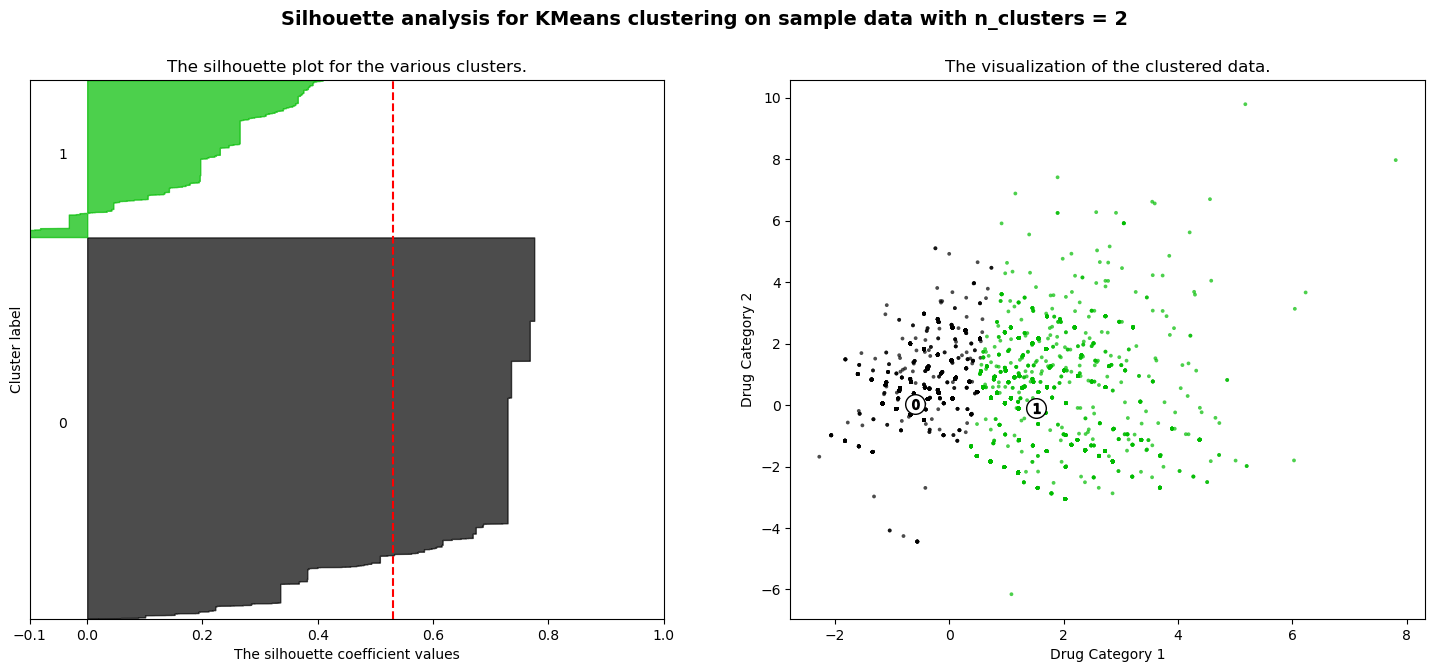

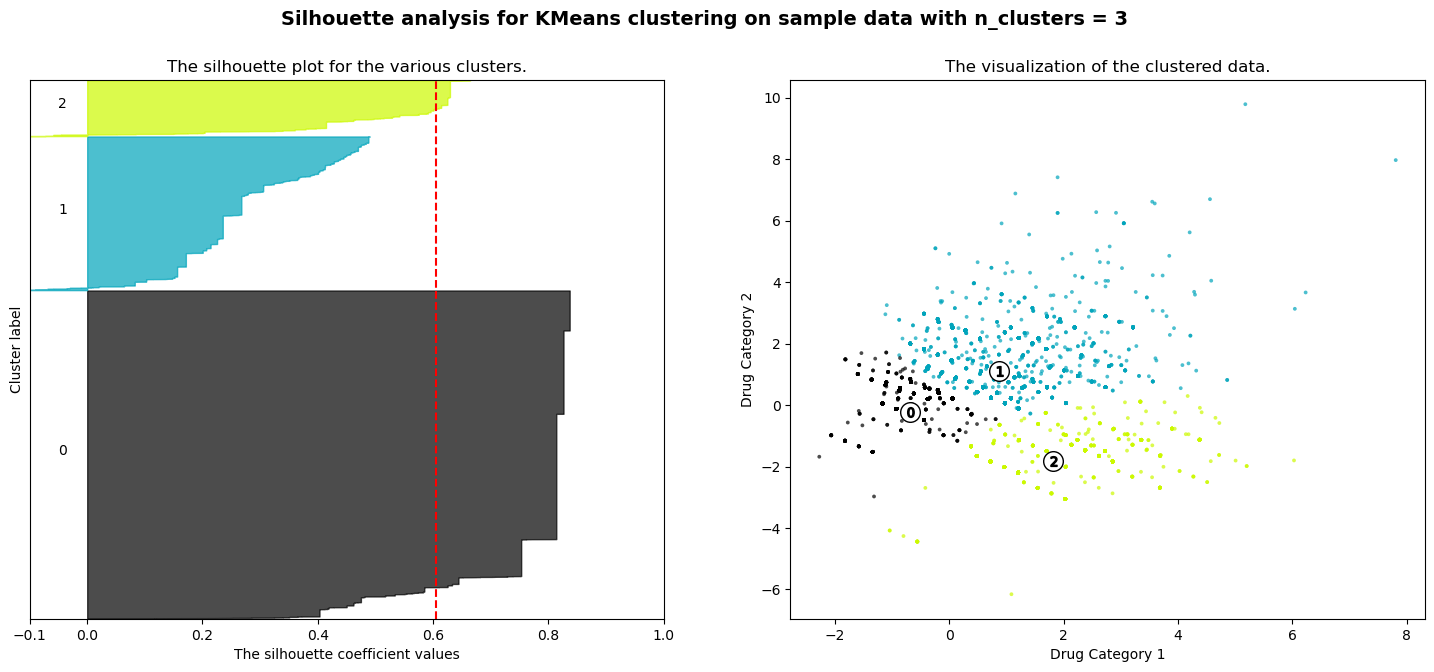

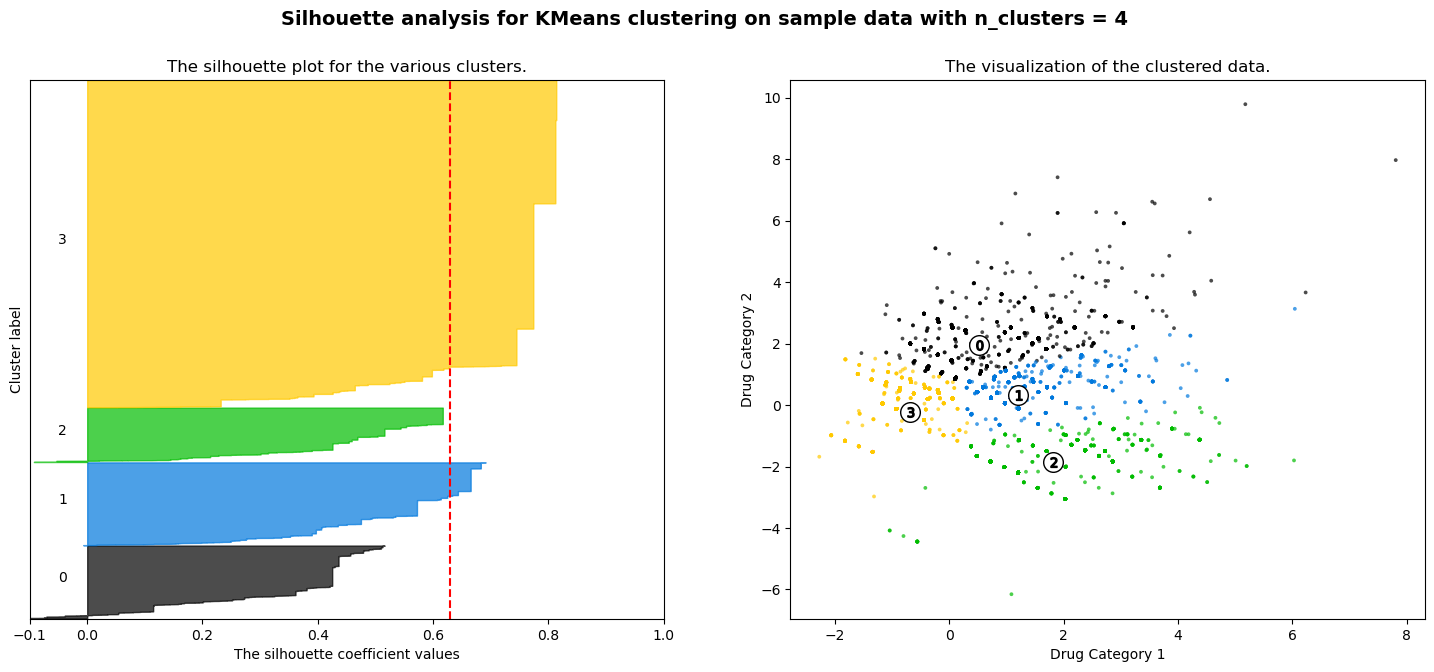

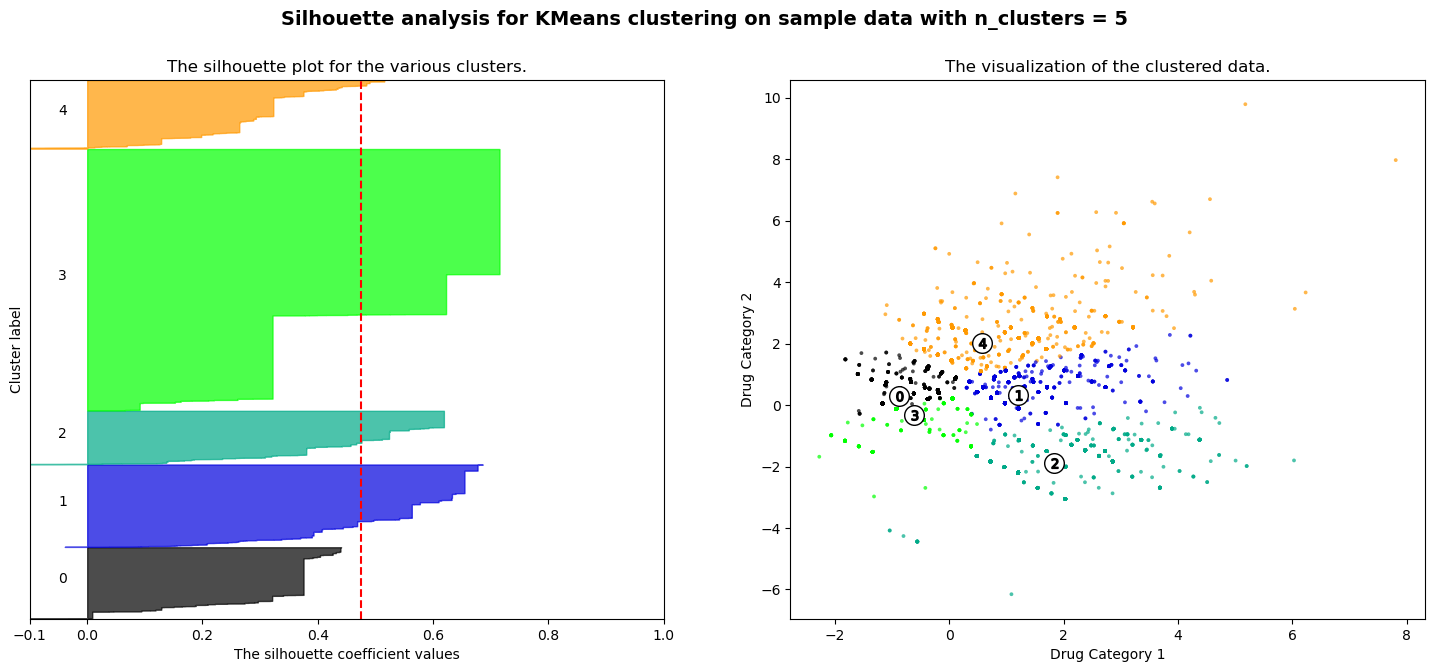

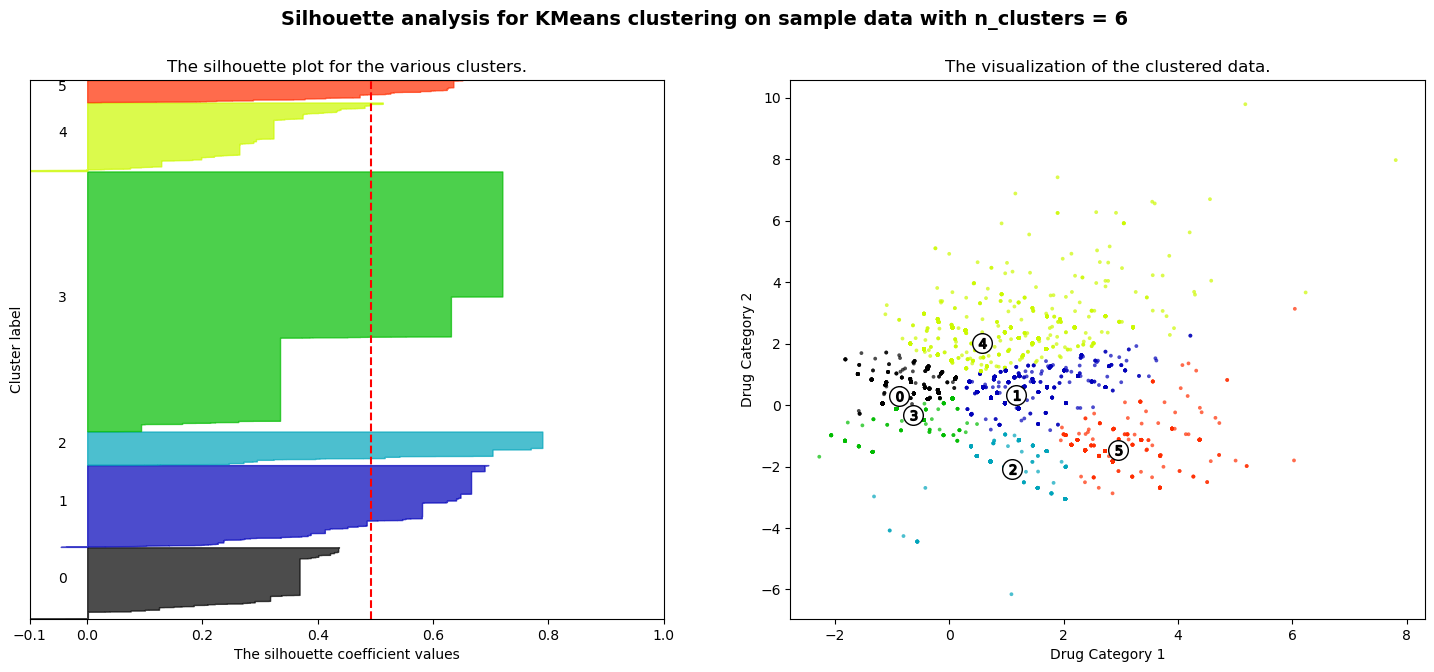

In [331]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

# Randomly select 15,000 samples due to the larger data set
random_indices = np.random.choice(len(silhouette_data), size=15000, replace=False)
X = silhouette_data[random_indices]


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Drug Category 1")
    ax2.set_ylabel("Drug Category 2")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


### 14. KMeans clustering on silhouette_data and displaying results


In [332]:
# Displaying the cluster ID result after determining the optimal k value（2）for K-means clustering

k_means = KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(X)  # Data X (15,000 randomly selected samples in the previous step)
labels = k_means.labels_

data_choice_df = pd.DataFrame(X, columns=['Drug Category 1', 'Drug Category 2'])  
data_choice_df['Cluster ID'] = labels

print(data_choice_df.head(20))


    Drug Category 1  Drug Category 2  Cluster ID
0         -2.065417        -0.982858           0
1          0.721922        -1.838559           1
2         -0.427358         0.574255           0
3          1.227451         0.939643           1
4         -0.441925        -0.486319           0
5         -0.683247        -0.306098           0
6         -1.165891         0.054345           0
7          1.958701         0.929265           1
8         -0.668680         0.754476           0
9          2.525024        -2.355211           1
10        -0.924569        -0.125876           0
11         1.212884        -0.120932           1
12         1.212884        -0.120932           1
13         2.192123         2.523562           1
14        -0.186035         0.394033           0
15        -0.683247        -0.306098           0
16         0.055287         0.213812           0
17         0.281117         2.430225           0
18        -0.441925        -0.486319           0
19        -0.441925 

## Report: KMeans Method



After observing the scatter plot (step 11), we noticed that the data exhibited a single cluster with an elongated elliptical distribution. Subsequently, through data preprocessing and dimensionality reduction, I utilized the SSE method to determine the optimal value of K for K-means clustering as 2.

When K is set to 2, there are cluster 0 and cluster 1. By comparing the data of these two clusters, I found that individuals with low insulin usage were grouped into cluster 0, while those with high insulin usage were in cluster 1. The ratio of insulin usage between cluster 0 and cluster 1 is close to 1:11. It is tentatively speculated that the classification rules of the clusters are related to insulin usage.


Cluster ID   insulin  
<span style="color:red">Cluster 0   0.204946</span>  
<span style="color:green">Cluster 1   2.270668</span>

However, during the silhouette coefficient analysis of the K-means clustering (step 13), I observed that the average silhouette coefficient continued to increase as K increased after multiple runs, which may indicate a risk of overfitting with an increased number of clusters. Although the selected K value of 2 is considered the optimal number of clusters, the resulting average silhouette coefficient is only around 0.52, indicating a medium rate, and it is the lowest among other K values.

<span style="color:red">For n_clusters = 2</span>  
The average silhouette_score is : 0.5250715248632978

<span style="color:blue">For n_clusters = 3</span>  
The average silhouette_score is : 0.5497215580266462  

<span style="color:green">For n_clusters = 4</span>  
The average silhouette_score is : 0.5378325842808004  

<span style="color:orange">For n_clusters = 5</span>  
The average silhouette_score is : 0.5328484750640221  

<span style="color:purple">For n_clusters = 6</span>  
The average silhouette_score is : 0.5812506724093558  

However, we know that the K-means clustering method is not suitable for handling non-circular shaped clusters, while our data exhibits a non-circular distribution. Therefore, the poor performance of the results is reasonable, as our data, being non-circular, is not suitable for analysis using the K-means clustering method. Thus, the reliability of inferring the correlation between insulin usage and the classification rules of K-means clusters is questionable.

Therefore, I need to find a clustering method suitable for handling this type of clusters. In this regard, we opted for the second method of DBSCAN because DBSCAN is a clustering algorithm adept at handling non-circular clusters.

## Method 2:   DBSC

### 1. Prepare data for DBSCAN clustering

In [333]:
DBSC_data=medicaPCA_result_data.copy()

In [334]:
from sklearn.cluster import DBSCAN

# Due to the significant computational resources required by the DBSCAN algorithm, 
# I opted to randomly select 15,000 samples for analysis

random_indices = np.random.choice(len(DBSC_data), size=15000, replace=False)
selected_ = DBSC_data[random_indices]

# Convert 'selected data' to a DataFrame
data_df = pd.DataFrame(selected_data, columns=['Drug Category 1', 'Drug Category 2'])

### 2. Perform DBSCAN clustering with different values

### value 1:   eps=3, min_samples=80

<Axes: xlabel='Drug Category 1', ylabel='Drug Category 2'>

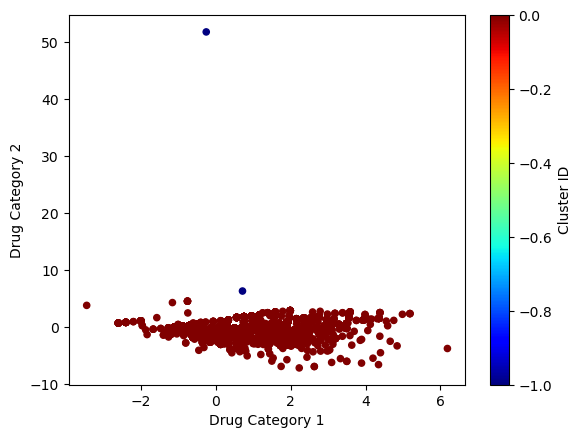

In [335]:
db = DBSCAN(eps=3, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')


### value 2:  eps=1, min_samples=80

<Axes: xlabel='Drug Category 1', ylabel='Drug Category 2'>

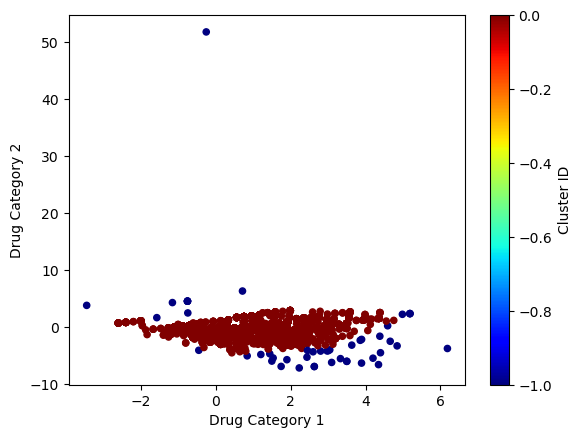

In [336]:

db = DBSCAN(eps=1, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

### value 3: eps=0.5, min_samples=60

<Axes: xlabel='Drug Category 1', ylabel='Drug Category 2'>

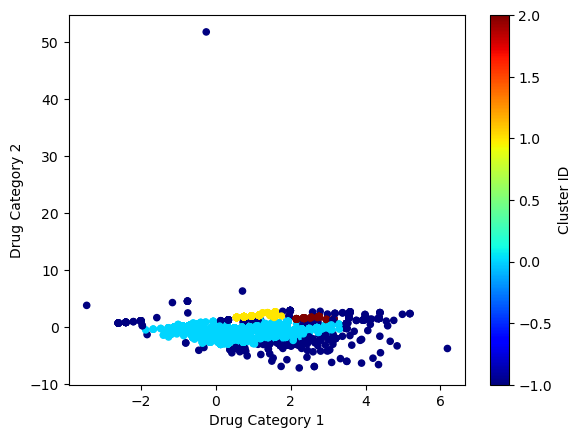

In [337]:
db = DBSCAN(eps=0.5, min_samples=60).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

## Report: DBSCAN Method

Due to the significant computational resources required by the DBSCAN algorithm, I opted to randomly select 15,000 samples for analysis. 

In the DBSCAN plot, we can visually observe that our clusters are elongated ellipses. If the DBSCAN analysis results highly overlap with the visually observed clusters, it indicates that our data is well-suited for this algorithm; otherwise, it is not. After trying various parameters, I selected the following three pairs for analysis:


<span style="color:red">- **Value 1:** eps=3, min_samples=80</span><br>
<span style="color:blue">- **Value 2:** eps=1, min_samples=80</span><br>
<span style="color:green">- **Value 3:** eps=0.5, min_samples=60</span> 


Upon adjusting the parameters, I found that when using Value 1, an ideal cluster was formed,and the outlier points were excluded from the cluster. Values lower than this threshold resulted in multiple clusters, which broke down the ideal cluster—a result we did not desire. Therefore, at this stage, I compared the results with those of K-means. Without knowing the K value, we adjusted the density parameters and obtained ideal cluster formations. The conclusion at this stage is that DBSCAN is more suitable for clustering our data compared to the K-means algorithm.

However, I still wanted to explore a third clustering method to see if it could outperform DBSCAN. Hence, I utilized Hierarchical Clustering.


## Method 3: Hierarchical clustering

### 1. Prepare data for hierarchical clustering

In [338]:
Hiera_data=medicaPCA_result_data.copy()

In [339]:
# Due to the higher computational cost of hierarchical clustering, I limited the dataset to 10000 points

random_indices = np.random.choice(len(Hiera_data), size=10000, replace=False)
selected_data = Hiera_data[random_indices]


# Convert 'data' to a DataFrame
data_df = pd.DataFrame(selected_data, columns=['Drug Category 1', 'Drug Category 2'])

### 2. Displaying the scatter plot of the selected data before analysis.

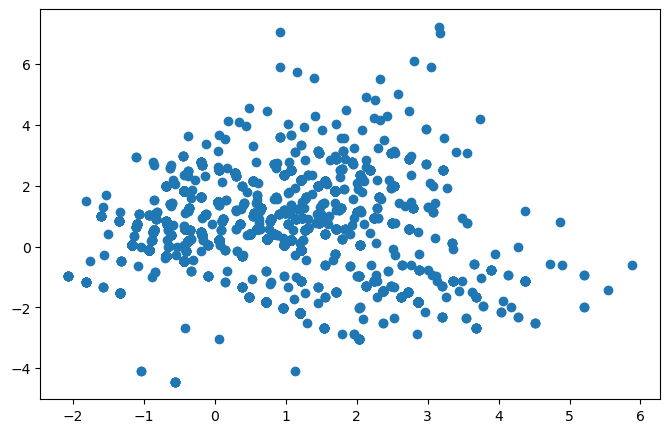

In [340]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(bottom=0.1)
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1])

plt.show()

### 3. Setting cluster value to 2 for Hierarchical Clustering analysis, and testing 3 different linkage methods to find the best fit for our dataset

### Method1:  linkage= single

In [341]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
cluster_labels = cluster.fit_predict(data_df)
print(cluster_labels)

[0 0 0 ... 0 0 0]


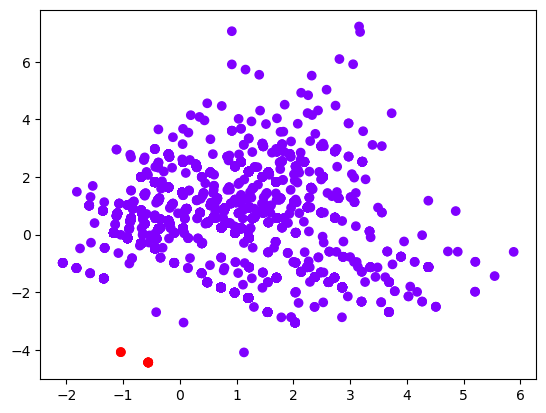

In [342]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

### Method2: linkage= complete

In [343]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
cluster_labels = cluster.fit_predict(data_df)

print(cluster_labels)

[0 0 0 ... 0 0 0]


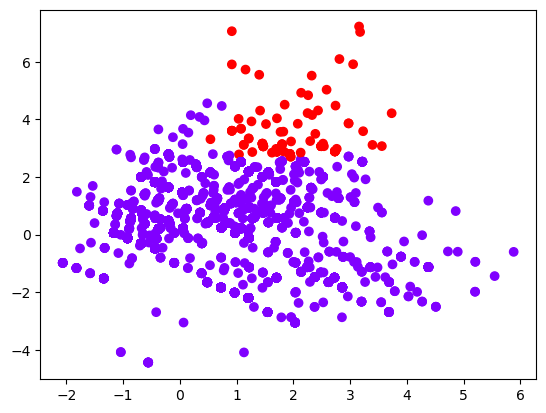

In [344]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

### Method3: linkage= average

In [345]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster_labels = cluster.fit_predict(data_df)
print(cluster_labels)

[0 0 0 ... 0 0 0]


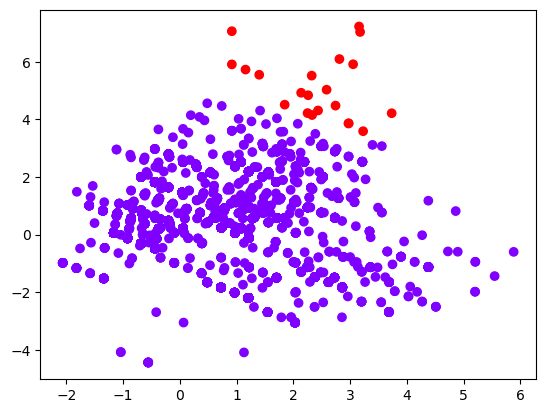

In [346]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')


## Report:  Hierarchical clustering

Due to the higher computational cost associated with hierarchical clustering, I limited the dataset to 10,000 points. Additionally, based on the previous SSE analysis, we determined that the optimal value of K for clustering is 2. Therefore, I selected K=2 for clustering. In Step 2, we observed an elongated cluster with a few outlier points in the original scatter plot. 

After conducting analyses using Method 1 through Method 3, we noticed minimal variation in results across different linkage methods (single, complete, and average) due to the high density of the random data we generated (the dataset of every run is different). 

However, in scenarios with a higher density of outliers, the results obtained using the average linkage method were more stable and less affected by outliers compared to the single linkage method, which exhibited the greatest sensitivity to outliers. Since my data is primarily discrete, I prefer to use the average linkage method for hierarchical clustering.

Given the substantial size of our dataset (over 90,000 rows), employing hierarchical clustering would be particularly slow and inefficient. Therefore, I believe it is not the optimal choice. Considering both computational cost and efficiency, I conclude that hierarchical clustering is not superior to the DBSCAN algorithm for our dataset. 

Hence, the final conclusion is that DBSCAN is the most suitable choice for our data, not only for its suitability in analyzing our non-circular shaped clusters but also for its superior performance in terms of computational cost and speed compared to hierarchical clustering.